In [1]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np

In [3]:
arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
arucoParams = cv2.aruco.DetectorParameters_create()

In [4]:
image = cv2.imread("../arucotest.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
(all_corners, ids, rejected) = cv2.aruco.detectMarkers(image, arucoDict, parameters=arucoParams)
print(np.array(all_corners).shape)

(2, 1, 4, 2)


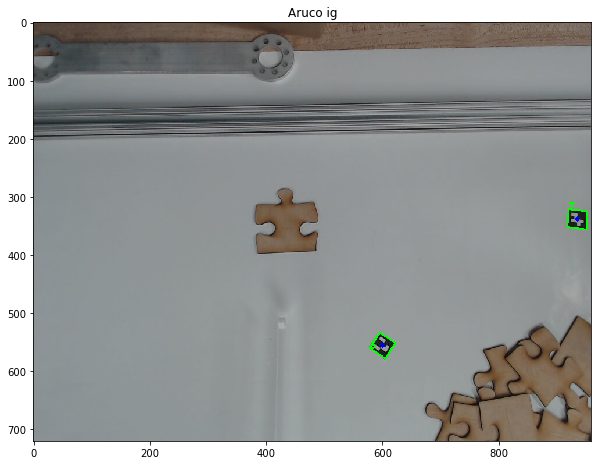

In [5]:
# verify *at least* one ArUco marker was detected
if len(all_corners) > 0:
    labelled_img = image
    # flatten the ArUco IDs list
    ids = ids.flatten()
    # loop over the detected ArUCo corners
    for (markerCorner, markerID) in zip(all_corners, ids):
        # extract the marker corners (which are always returned in
        # top-left, top-right, bottom-right, and bottom-left order)
        corners = markerCorner.reshape((4, 2))
        (topLeft, topRight, bottomRight, bottomLeft) = corners
        
        # convert each of the (x, y)-coordinate pairs to integers
        topRight = (int(topRight[0]), int(topRight[1]))
        bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
        bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
        topLeft = (int(topLeft[0]), int(topLeft[1]))
        
        # draw the bounding box of the ArUCo detection
        cv2.line(labelled_img, topLeft, topRight, (0, 255, 0), 2)
        cv2.line(labelled_img, topRight, bottomRight, (0, 255, 0), 2)
        cv2.line(labelled_img, bottomRight, bottomLeft, (0, 255, 0), 2)
        cv2.line(labelled_img, bottomLeft, topLeft, (0, 255, 0), 2)
        
        # compute and draw the center (x, y)-coordinates of the ArUco
        cX = int((topLeft[0] + bottomRight[0]) / 2.0)
        cY = int((topLeft[1] + bottomRight[1]) / 2.0)
        cv2.circle(labelled_img, (cX, cY), 4, (0, 0, 255), -1)
        
        # draw the ArUco marker ID on the image
        cv2.putText(labelled_img, str(markerID),(topLeft[0], topLeft[1]), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 2)
        # show the output image
plt.figure(figsize=(10, 10))
plt.title("Aruco ig")
plt.imshow(labelled_img)